In [7]:
import pandas as pd

df = pd.read_pickle('df.pkl')

# Dataset basic analysis

In [59]:
print(f"Number of columns: {len(df.columns)}")
print(f"Columns: {', '.join(list(df.columns))}")
print(f"Number of rows: {len(df)}")
print(df.head())

Number of columns: 180
Columns: value_target, class_target, well_plate_name, wp_image_version, wp_image_prop, well_name, mock, FNumber, FocalLengthIn35mmFilm, ISOSpeedRatings, Orientation, ExposureTime, FocalLength, Flash, MeteringMode, MaxApertureValue, ExposureBiasValue, BrightnessValue, ApertureValue, ShutterSpeedValue, full_gray_mean, full_gray_stddev, full_gray_mean_trm30, full_gray_skewness, full_gray_entropy, full_gray_entropy2, full_gray_entropy_glcm, full_gray_mean_PIL, full_blue_mean, full_blue_stddev, full_blue_mean_trm30, full_blue_skewness, full_blue_entropy, full_blue_entropy2, full_blue_entropy_glcm, full_blue_mean_PIL, full_green_mean, full_green_stddev, full_green_mean_trm30, full_green_skewness, full_green_entropy, full_green_entropy2, full_green_entropy_glcm, full_green_mean_PIL, full_red_mean, full_red_stddev, full_red_mean_trm30, full_red_skewness, full_red_entropy, full_red_entropy2, full_red_entropy_glcm, full_red_mean_PIL, full_L_mean, full_L_stddev, full_L_mean

# Theory

CFU stands for Colony Forming Units, which is a measure used in microbiology to estimate the number of viable bacteria or fungal cells in a sample. It's not a direct measurement of the total quantity of bacteria, but rather a measure of the number of cells capable of dividing and forming colonies.

In simple words, it is the number of "units of bacteria" capable of forming colonies. 

# Class analysis

Number of classes: 6
Classes: ['0000 CFU:mL', '10^1 CFU:mL', '10^2 CFU:mL', '10^4 CFU:mL', '10^6 CFU:mL', '10^8 CFU:mL']
Number of samples in class "0000 CFU:mL": 11616
Number of samples in class "10^1 CFU:mL": 12672
Number of samples in class "10^2 CFU:mL": 11232
Number of samples in class "10^4 CFU:mL": 8544
Number of samples in class "10^6 CFU:mL": 13056
Number of samples in class "10^8 CFU:mL": 4896


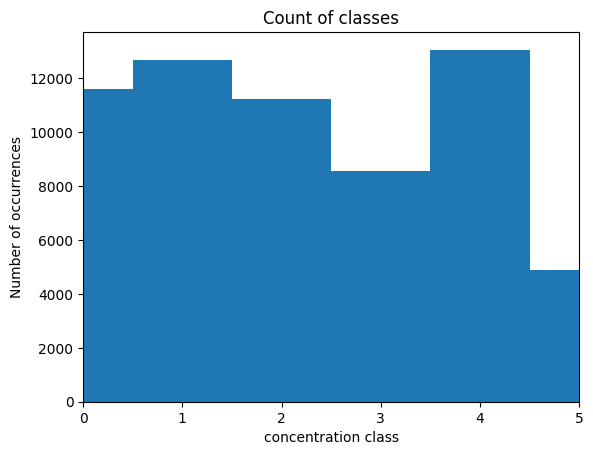

In [52]:
# Find classes
# classes = df['class_target'].unique()
classes = sorted(df['class_target'].unique())
print(f"Number of classes: {len(classes)}")
print(f"Classes: {classes}")

# Find number of samples per class
# classes_counts = df['class_target'].value_counts()
# print(classes_counts)
classes_counts = []
for c in classes:
    class_count = len(df[df['class_target'] == c])
    classes_counts.append(class_count)
    print(f"Number of samples in class \"{c}\": {class_count}")

# # Get distribution of gold concentration
import matplotlib.pyplot as plt

# Count the occurrences of value_target in each interval
intervals = list(range(0, len(classes)))
# Plot the histogram
plt.bar(intervals, classes_counts, width=1)

# Set the labels and title
plt.xlabel('concentration class')
plt.ylabel('Number of occurrences')
plt.title('Count of classes')

# Adjust x-axis to start from 0
plt.xlim(0, max(intervals))

# Show the plot
plt.show()


# Regression analysis

Max concentration: 1.521
Min concentration: 0.184


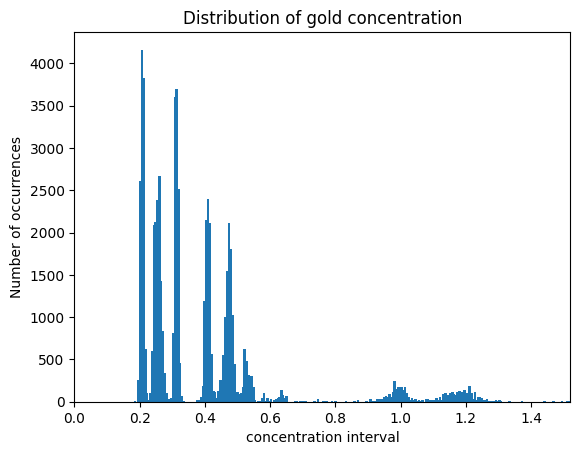

In [50]:
# Get distribution of gold concentration
import matplotlib.pyplot as plt

# Get the maximum and minimum values of value_target
max_value = df['value_target'].max()
min_value = df['value_target'].min()

print(f"Max concentration: {max_value}")
print(f"Min concentration: {min_value}")

# Calculate the step size
number_of_intervals = 250
step_size = (max_value - min_value) / number_of_intervals
intervals = [min_value + i * step_size for i in range(number_of_intervals + 1)]

# Count the occurrences of value_target in each interval
value_counts, _, _ = plt.hist(df['value_target'], bins=intervals)

# Plot the histogram
plt.bar(intervals[:-1], value_counts, width=step_size)

# Set the labels and title
plt.xlabel('concentration interval')
plt.ylabel('Number of occurrences')
plt.title('Distribution of gold concentration')

# Adjust x-axis to start from 0
plt.xlim(0, max(intervals))

# Show the plot
plt.show()


# Missing Data Analysis

Percentage of missing values per column:
value_target: 0.0%
class_target: 0.0%
well_plate_name: 0.0%
wp_image_version: 0.0%
wp_image_prop: 0.0%
well_name: 0.0%
mock: 0.0%
FNumber: 0.0%
FocalLengthIn35mmFilm: 0.0%
ISOSpeedRatings: 0.0%
Orientation: 0.0%
ExposureTime: 0.0%
FocalLength: 0.0%
Flash: 0.0%
MeteringMode: 0.0%
MaxApertureValue: 0.0%
ExposureBiasValue: 0.0%
BrightnessValue: 0.0%
ApertureValue: 0.0%
ShutterSpeedValue: 0.0%
full_gray_mean: 0.0%
full_gray_stddev: 0.0%
full_gray_mean_trm30: 0.0%
full_gray_skewness: 0.0%
full_gray_entropy: 0.0%
full_gray_entropy2: 0.0%
full_gray_entropy_glcm: 0.0%
full_gray_mean_PIL: 0.0%
full_blue_mean: 0.0%
full_blue_stddev: 0.0%
full_blue_mean_trm30: 0.0%
full_blue_skewness: 0.0%
full_blue_entropy: 0.0%
full_blue_entropy2: 0.0%
full_blue_entropy_glcm: 0.0%
full_blue_mean_PIL: 0.0%
full_green_mean: 0.0%
full_green_stddev: 0.0%
full_green_mean_trm30: 0.0%
full_green_skewness: 0.0%
full_green_entropy: 0.0%
full_green_entropy2: 0.0%
full_green_entrop

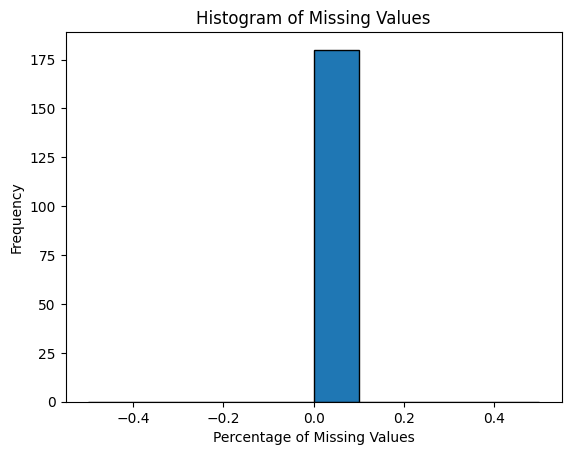

In [44]:
import numpy as np

print("Percentage of missing values per column:")
pct_missings = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    pct_missings.append(pct_missing)
    print(f'{col}: {pct_missing}%')

print(f"Mean percentage of missing values: {np.mean(pct_missings)}")

# Print the histogram of missing values using matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(pct_missings, bins=10, edgecolor='black')
ax.set_title('Histogram of Missing Values')
ax.set_xlabel('Percentage of Missing Values')
ax.set_ylabel('Frequency')
plt.show()

## Outlier Analysis

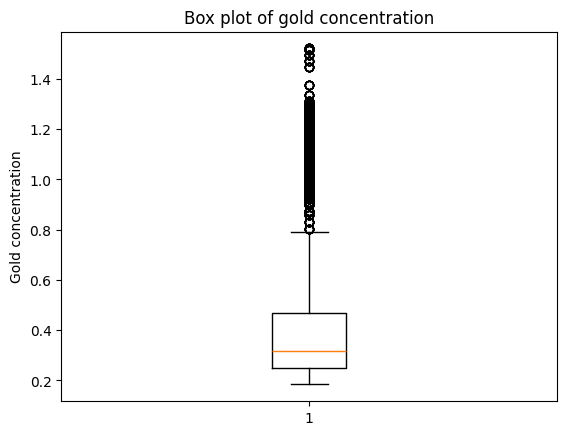

Number of outliers: 40


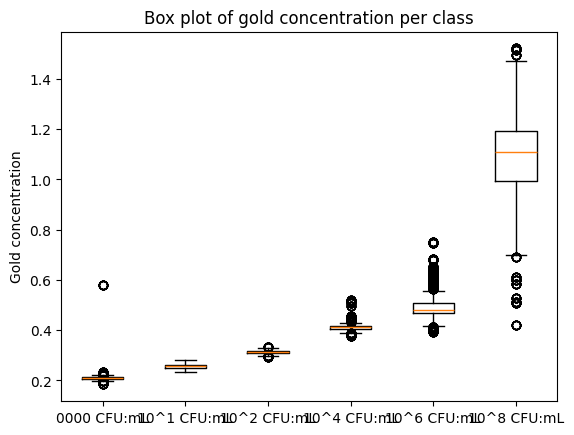

In [58]:
# Box plot of the gold concentration
import matplotlib.pyplot as plt

plt.boxplot(df['value_target'])
plt.title('Box plot of gold concentration')
plt.ylabel('Gold concentration')
plt.show()

# Count number of outliers
# # Count number of occurrences greater than 3 standard deviations from the mean
# mean = df['value_target'].mean()
# std = df['value_target'].std()
# outliers = df[(df['value_target'] > mean + 3 * std) | (df['value_target'] < mean - 3 * std)]
# print(f"Number of outliers: {len(outliers)}")

# Count number of occurrences greater than max_value or less than min_value
max_value = 1.4
min_value = 0.7

# outliers = df[(df['value_target'] > max_value) | (df['value_target'] < min_value)]
outliers = df[(df['value_target'] > max_value)]
print(f"Number of outliers: {len(outliers)}")

# Box plot of the gold concentration per class
import matplotlib.pyplot as plt

# Create a list of gold concentrations per class
class_values = []
for c in classes:
    class_values.append(df[df['class_target'] == c]['value_target'])

# Create a box plot
plt.boxplot(class_values)
plt.title('Box plot of gold concentration per class')
plt.ylabel('Gold concentration')
plt.xticks(range(1, len(classes) + 1), classes)
plt.show()

# Classification

Algorithms we can use:
- K-means
- K-medoids
- Hierarchical clustering

## K-means and K-medoids

### Data pre processing

## Hierarchical clustering

### Data pre processing

## Deep learning

### Data pre processing